In [1]:
import pandas as pd
import numpy as np
from sklearn import pipeline,preprocessing,metrics,model_selection,ensemble
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import shap
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
shap.initjs()

In [3]:
df=pd.read_csv(r"C:\Users\gvarv\anaconda3\envs\thesis\MPG\mpg_data_example.csv")
df.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


In [4]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [6]:
#exoyme 6 mhdenikes times sto feature "Horsepower" to opoio einai float opote tha xekinhsoyme apo edw to preprocessing

In [7]:
df['horsepower']= df['horsepower'].fillna(df['horsepower'].mean())

In [8]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [9]:
df.head()
print(df)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1      

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='car name', ylabel='count'>

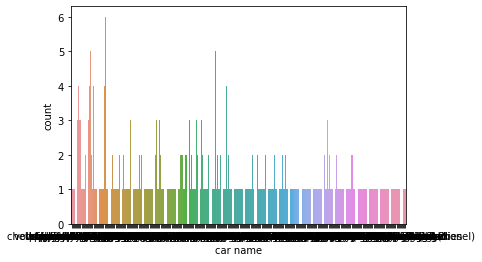

In [10]:
sns.countplot(df['car name'])

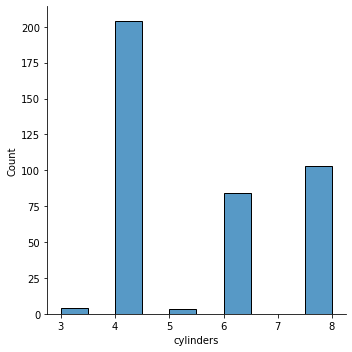

In [11]:
sns.displot(df['cylinders'])

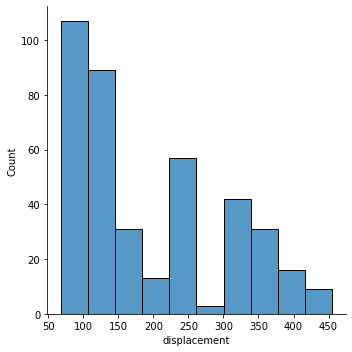

In [12]:
sns.displot(df['displacement'])

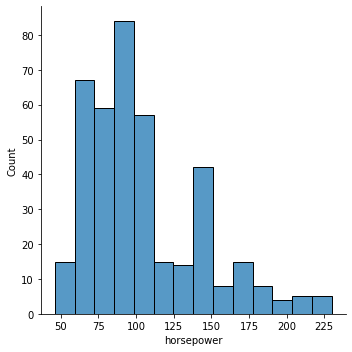

In [13]:
sns.displot(df['horsepower'])

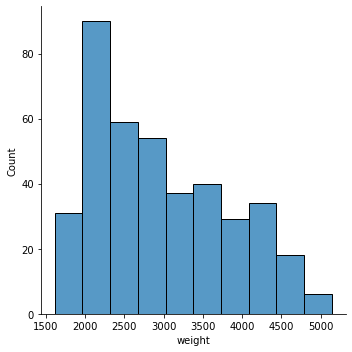

In [14]:
sns.displot(df['weight'])

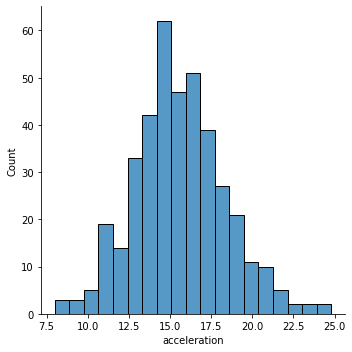

In [15]:
sns.displot(df['acceleration'])

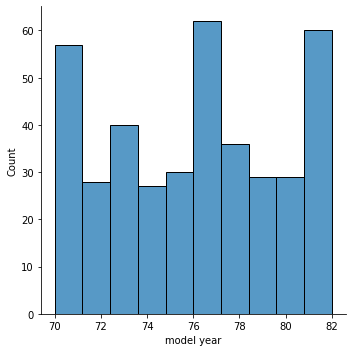

In [16]:
sns.displot(df['model year'])

In [17]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import MinMaxScaler

In [18]:
# sc = StandardScaler()
# le = LabelEncoder()
# mms = MinMaxScaler()

In [19]:
# df[['cylinders','displacement','weight','acceleration','model year']]= sc.fit_transform(df[['cylinders','displacement','weight','acceleration','model year']])
# df.head(30)

In [20]:
#df[['cylinders','displacement','weight','acceleration','model year']]= mms.fit_transform(df[['cylinders','displacement','weight','acceleration','model year']])

In [21]:
df.head(30)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


In [22]:
df[['cylinders','weight','model year','origin']] = df[['cylinders','weight','model year','origin']].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    float64
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    float64
 7   origin        398 non-null    float64
 8   car name      398 non-null    object 
dtypes: float64(8), object(1)
memory usage: 28.1+ KB


In [23]:
df.shape

(398, 9)

In [24]:
x = df.drop(columns=['mpg','car name','origin'], axis=1)
y = df['mpg']

In [25]:
print(x)

     cylinders  displacement  horsepower  weight  acceleration  model year
0          8.0         307.0       130.0  3504.0          12.0        70.0
1          8.0         350.0       165.0  3693.0          11.5        70.0
2          8.0         318.0       150.0  3436.0          11.0        70.0
3          8.0         304.0       150.0  3433.0          12.0        70.0
4          8.0         302.0       140.0  3449.0          10.5        70.0
..         ...           ...         ...     ...           ...         ...
393        4.0         140.0        86.0  2790.0          15.6        82.0
394        4.0          97.0        52.0  2130.0          24.6        82.0
395        4.0         135.0        84.0  2295.0          11.6        82.0
396        4.0         120.0        79.0  2625.0          18.6        82.0
397        4.0         119.0        82.0  2720.0          19.4        82.0

[398 rows x 6 columns]


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [27]:
#MODEL TRAINING
def classify(model, x ,y):
    model.fit(x_train, y_train)
    print ('Accuracy is', model.score(x_test, y_test)*100)
    

In [29]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000, max_depth=None, min_samples_split=2, random_state=0)
classify(model, x, y)

Accuracy is 89.20290288953805


In [33]:
x_train.head(20)

,cylinders,displacement,horsepower,weight,acceleration,model year
64,8.0,318.0,150.0,4135.0,13.5,72.0
55,4.0,97.0,60.0,1834.0,19.0,71.0
317,4.0,97.0,78.0,2188.0,15.8,80.0
102,4.0,97.0,46.0,1950.0,21.0,73.0
358,4.0,120.0,74.0,2635.0,18.3,81.0
331,4.0,97.0,67.0,2145.0,18.0,80.0
371,4.0,135.0,84.0,2525.0,16.0,82.0
261,6.0,258.0,120.0,3410.0,15.1,78.0
299,4.0,141.0,71.0,3190.0,24.8,79.0
378,4.0,105.0,63.0,2125.0,14.7,82.0


In [36]:
x_train.to_csv(r'C:\Users\gvarv\anaconda3\envs\thesis\MPG\x_trainMPGwithHeader.csv', index = False, header=True)

In [29]:
model.predict(x_test)

array([14.1785, 24.568 , 14.4602, 20.8778, 18.408 , 30.2648, 33.7128,
       21.5769, 15.0935, 26.5413, 33.1949, 37.6427, 19.0127, 26.8099,
       16.2555, 32.5162, 28.1522, 27.0977, 17.2712, 34.7531, 15.7988,
       23.4471, 23.831 , 20.6349, 32.621 , 26.2079, 33.7546, 32.0127,
       31.7242, 16.0257, 18.9618, 33.129 , 18.0581, 32.1544, 21.0917,
       23.9437, 18.6274, 16.0215, 34.266 , 11.999 , 13.7945, 15.0994,
       28.4683, 33.2691, 26.5388, 21.725 , 19.6534, 14.4695, 21.5912,
       30.7339, 33.8841, 25.5889, 16.367 , 27.1537, 15.2576, 11.977 ,
       19.056 , 23.8105, 31.8387, 17.0117, 19.4344, 25.6243, 19.2561,
       20.9465, 13.0685, 14.7379, 13.572 , 17.3373, 24.4892, 14.3065,
       35.8374, 13.035 , 23.3026, 18.5009, 23.9866, 28.865 , 27.3638,
       31.056 , 29.8213, 14.0528])

In [30]:
 import joblib

In [31]:
joblib.dump(model,'RFModelforMPG.pkl')

['RFModelforMPG.pkl']

In [32]:
modelReload=joblib.load('RFModelforMPG.pkl')

In [33]:
modelReload.predict(x_test)

array([14.1785, 24.568 , 14.4602, 20.8778, 18.408 , 30.2648, 33.7128,
       21.5769, 15.0935, 26.5413, 33.1949, 37.6427, 19.0127, 26.8099,
       16.2555, 32.5162, 28.1522, 27.0977, 17.2712, 34.7531, 15.7988,
       23.4471, 23.831 , 20.6349, 32.621 , 26.2079, 33.7546, 32.0127,
       31.7242, 16.0257, 18.9618, 33.129 , 18.0581, 32.1544, 21.0917,
       23.9437, 18.6274, 16.0215, 34.266 , 11.999 , 13.7945, 15.0994,
       28.4683, 33.2691, 26.5388, 21.725 , 19.6534, 14.4695, 21.5912,
       30.7339, 33.8841, 25.5889, 16.367 , 27.1537, 15.2576, 11.977 ,
       19.056 , 23.8105, 31.8387, 17.0117, 19.4344, 25.6243, 19.2561,
       20.9465, 13.0685, 14.7379, 13.572 , 17.3373, 24.4892, 14.3065,
       35.8374, 13.035 , 23.3026, 18.5009, 23.9866, 28.865 , 27.3638,
       31.056 , 29.8213, 14.0528])

In [41]:
temp={}
temp['cylinders']=8
temp['displacement']=150
temp['horsepower']=165
temp['weight']=4209
temp['acceleration']=12
temp['model year']=71


In [42]:
sampleDataFeatures = np.asarray(
            [list(item.values()) for item in ({'x': temp}).values()]) 

In [43]:
sampleDataFeatures

array([[   8,  150,  165, 4209,   12,   71]])

In [44]:
modelReload.predict(sampleDataFeatures)[0]

17.665000000000024

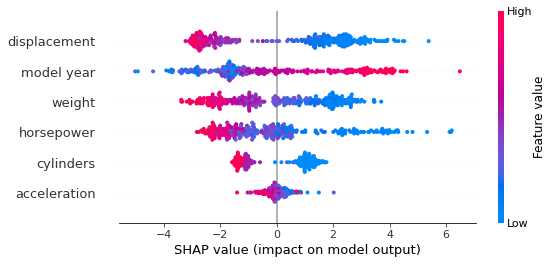

In [45]:
explainer = shap.TreeExplainer(modelReload)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values, x_train)

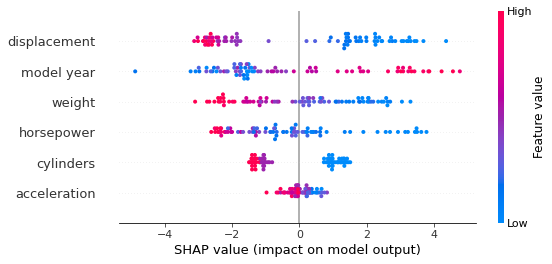

In [46]:
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

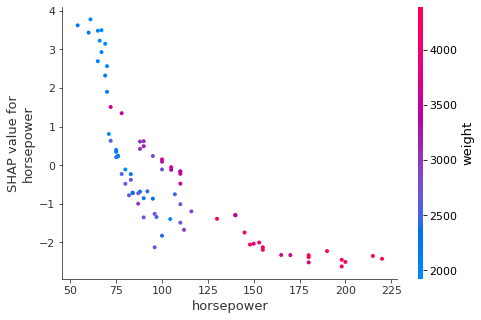

In [47]:
shap.dependence_plot("horsepower", shap_values, x_test)

In [53]:
shap_values = explainer.shap_values( x_train.iloc[302,:])
shap.force_plot(explainer.expected_value, shap_values, x_train.iloc[302,:])